# Python Homework Trevor Nolan

3-30-2017

**Description**: 

In [1]:
######################## BCB 546X: Python Assignment Details ########################

## Your Mission: Complete Python code in a Jupyter Notebook ##
## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook
## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion
## 3. Write an alternative translation function
## 4. Write a function (or 3 functions) that calculates the proportion of each of 3 amino acid categories in a sequence
## 5. In the MAIN part of the script, call your functions from 3 (or 2) and 4 and complete the empty columns in the dataframe
## 6. Plot a bar-chart of adult mass per species
## 7. Plot a graph that shows the amino-acid type proportions
## 8. Write the entire dataframe to a new CSV file
## 9. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. 
## ** Do all of this in a Jupyter notebook and push it to a GitHub repository
## ** Be sure to cite (by providing URLs) information appropriately in your documented notebook.
## ** Commit and push your completed work in the Jupyter notebook to your repository
## ** Create a link to your completed Jupyter notebook using https://nbviewer.jupyter.org
## ** Send the above link *AND* the URL to your git repository to the instructors via Slack by the end of the day on March 31.

## Not all of these tasks have been covered in class and you will 
## have to use online resources to find out how to do some of these tasks.



## Python Translate Script 

In [2]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

# Functions 

## #1 - This gets the sequence

* takes a fasta file as input and returns a dictionary containing species names as keys and sequences as values

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} # initalize dictionary for seq name: seq pairs
    for record in SeqIO.parse(fasta_fn, "fasta"): # for loop to parse each seqeunce in input fasta file, getting seq names from description
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

### Create `seqs` from `bears_cytb.fasta` file using `get_sequences_from_file` function

* example of usage and output

In [4]:
seqs = get_sequences_from_file("bears_cytb.fasta") 
seqs

{'Ailuropoda melanoleuca': Seq('ATGATCAACATCCGAAAAACTCATCCATTAGTTAAAATTATCAACAACTCATTC...AGA', SingleLetterAlphabet()),
 'Helarctos malayanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Melursus ursinus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATTAACAACTCACTC...AGA', SingleLetterAlphabet()),
 'Tremarctos ornatus': Seq('ATGACCAACATCCGAAAAACTCACCCACTAGCTAAAATCATCAACAGCTCATTC...AGA', SingleLetterAlphabet()),
 'Ursus americanus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus arctos': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCACTT...AGA', SingleLetterAlphabet()),
 'Ursus maritimus': Seq('ATGACCAACATCCGAAAAACCCACCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus spelaeus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCTAAAATCATCAACAACTCATTT...AGA', SingleLetterAlphabet()),
 'Ursus thibetanus': Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...A

In [5]:
type(seqs) #output of get_sequences_from_file funciton is a dictionary 

dict

In [6]:
seqs['Ursus thibetanus'] # example of what one key:value pair looks like

Seq('ATGACCAACATCCGAAAAACCCATCCATTAGCCAAAATCATCAACAACTCACTC...AGA', SingleLetterAlphabet())

## #2 - String-Translate Function

In [7]:
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that does this using loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

I broke this task down into several subfunctions, most of which are adapted from the following resource: https://munch-lab.org/2013/11/19/finding-open-reading-frames/.

### 1. Make a function to translate a single codon

In [8]:
def translateCodon(x):
    # turn into upper case - makes this function robust to lowercase inputs:
    codon = x.upper()
    # check if the codon is in the amino acid dictionary:
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    if codon in mito_table.forward_table:
        # return the aminoacid by looking up in the dictionary:
        return mito_table.forward_table[codon]
    elif codon in mito_table.stop_codons:
        # return '*' for a stop codon and 
        return '*'
    else: # return'?' if we could not translate the codon:
        return '?'

In [9]:
translateCodon('ATG') # test translate codon function

'M'

### 2. Make a function to break input into codons (strings of 3 chars)

In [10]:
def splitCodons(orf):
    # make sure the sequence length is a multiple of three:
    assert not len(orf) % 3
    # define a list for the results to be returned from the function:
    result = []
    # loop over a list of indexes generated by range.
    # from 0 to, but not including, len(orf), in jumps of 3
    for i in range(0, len(orf), 3):
        result.append(orf[i:i+3])
    return result

In [33]:
splitCodons(seqs['Ursus thibetanus']) # test with one entry from seq dict. 

NameError: name 'head' is not defined

### 3. Combine funtions 1 and 2 to make translate function

In [12]:
def translateSequence(orf):
     codons = splitCodons(orf)
     return ''.join(translateCodon(codon) for codon in codons)

In [13]:
translateSequence(seqs['Ursus thibetanus'])

/Users/TrevorNolan/anaconda3/lib/python3.6/site-packages/Bio/Seq.py:150: BiopythonWarning: Biopython Seq objects now use string comparison. Older versions of Biopython used object comparison. During this transition, please use hash(id(my_seq)) or my_dict[id(my_seq)] if you want the old behaviour, or use hash(str(my_seq)) or my_dict[str(my_seq)] for the new string hashing behaviour.
  "the new string hashing behaviour.", BiopythonWarning)


'MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQILTGLFLAMHYTSDATTAFSSVAHICRDVHYGWIIRYMHANGASMFFICLFMHVGRGLYYGSYLLSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDALGALLLILALATLVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLSKW*'

## #3 Alternate Translation function with Biopython

created using the code and reference from: http://biopython.org/DIST/docs/tutorial/Tutorial.html. 

In [14]:
#uses Biopython method .translate with Vertebrate Mito table and
#option to only translate to first in frame stop codon
def biopy_translate(orf):
    return orf.translate(table="Vertebrate Mitochondrial", to_stop=True)

In [15]:
biopy_translate(seqs['Ursus thibetanus'])

Seq('MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQILTGLFLAMH...SKW', ExtendedIUPACProtein())

## #4 Count AA Function
* write a function that computes the proportion of the 3 different categories of amino acid

In [16]:
#gets only the string output for the seq 
example_seq = biopy_translate(seqs['Ursus thibetanus'])
str(example_seq)

'MTNIRKTHPLAKIINNSLIDLPAPSNISAWWNFGSLLGMCLILQILTGLFLAMHYTSDATTAFSSVAHICRDVHYGWIIRYMHANGASMFFICLFMHVGRGLYYGSYLLSETWNIGIILLFTVMATAFMGYVLPWGQMSFWGATVITNLLSAIPYIGTDLVEWIWGGFSVDKATLTRFFAFHFILPFIILALAAVHLLFLHETGSNNPSGIPSDSDKIPFHPYYTIKDALGALLLILALATLVLFSPDLLGDPDNYTPANPLSTPPHIKPEWYFLFAYAILRSIPNKLGGVLALIFSILILAIIPLLHTSKQRGMMFRPLSQCLFWLLVADLLTLTWIGGQPVEHPFIIIGQLASILYFTILLVLMPIAGIIENNLSKW'

### This function uses biopython to count AA categories
From biopython tutorial: http://biopython.org/DIST/docs/tutorial/Tutorial.html

In [17]:
#with biopython
from Bio.SeqUtils.ProtParam import ProteinAnalysis # import ProteinAnalysis

def aa_anal(aa_seq): #function to compute proportion of polar, 
                     # charged and hydrophobic amino acids
                     # input should be AA seq string
    # use biopy protein analysis to get counts for each aa 
    analysed_seq = ProteinAnalysis(str(aa_seq)) 
    counts = analysed_seq.count_amino_acids()
    # get total length of seq
    length = len(str(aa_seq))
    #get proportion of each aa class from counts of each aa
    charged = ['R','K','D','E']
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    proportion_charged = (sum([counts[x] for x in charged]))/length
    proportion_polar = (sum([counts[x] for x in polar]))/length
    proportion_hydro = (sum([counts[x] for x in hydrophobic]))/length
    return proportion_charged, proportion_polar, proportion_hydro 


In [18]:
test = aa_anal(example_seq) # test function to compute aa catagories
test

(0.09234828496042216, 0.32717678100263853, 0.5804749340369393)

In [19]:
type(test) # aa_anal function returns a tuple

tuple

# Main

### 5. Call Functions to complete empty cols of df

In [20]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta") # use get_sequences_from_file to generate seq dict from "bears_ctyb.fasta"

In [21]:
# I filtered bear df to only have the species and mass entries - 
# will join the aa attributes below
bear_df = pd.read_csv("bears_data.csv", usecols=['species', 'mass']) 
# Includes only data for body mass currently and empty cells for other columns

#### for loop to translate the seqs and compute amino acid composition, adding to the bears df

In [22]:
prop_dict = {} # dictionary to hold output
for key, value in cytb_seqs.items(): # for loop to translate
    seq = biopy_translate(cytb_seqs[key])
    proportions = aa_anal(seq) # calc aa composition
    prop_dict[key] = proportions
    df = pd.DataFrame(prop_dict) #create DataFrame from output
    df2 = df.transpose()
    df2.index.name = 'species'
    df2.reset_index(inplace=True)
    df2.columns = ['species', 'charged', 'polar', 'hydrophobic']
    bear_df_aa = pd.merge(bear_df, df2) # join df to bears_df

In [23]:
bear_df_aa 

species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.329815     0.577836
1            Ursus arctos  203.500  0.092348  0.324538     0.583113
2        Ursus thibetanus   99.714  0.092348  0.327177     0.580475
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.089710  0.337731     0.572559
5     Helarctos malayanus   47.020  0.092348  0.340369     0.567282
6  Ailuropoda melanoleuca  118.200  0.089710  0.343008     0.567282
7      Tremarctos ornatus  140.700  0.089710  0.335092     0.575198
8         Ursus maritimus  425.100  0.092348  0.327177     0.580475

## Visualization

In [24]:
%matplotlib inline

## #6 Plot bar-chart of mass for each species

In [25]:
# sort dataframe by mass values so they are ascending 
bear_wt = bear_df_aa.sort_values(by='mass')

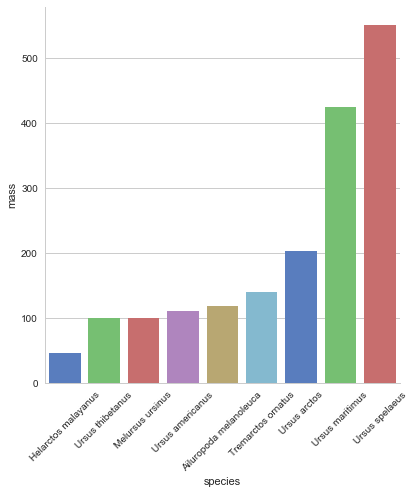

In [26]:
# plot mass by species using seaborn
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="species", y="mass", data=bear_wt,
                   size=6, kind="bar", palette="muted")
g.set_xticklabels(rotation=45) #rotate x-axis labels

## #7 Visualization of the proportions for amino-acid type for the bear species
What does this show about cytochrome-b for the bears?

**The plot below shows that ctypchrome-b is made up of highly similar amino acid compositions for the bears being investigated. The highest proportion of amino acids are hydrophobic followed by polar and charged groups.**

In [27]:
#convert bears data to long form first based on amino acid catagory
bears_long = pd.melt(bear_df_aa, value_name="proportion", 
                     var_name="aa_group", 
                     id_vars="species", 
                     value_vars=['charged','polar','hydrophobic'])
bears_long

species     aa_group  proportion
0           Ursus spelaeus      charged    0.092348
1             Ursus arctos      charged    0.092348
2         Ursus thibetanus      charged    0.092348
3         Melursus ursinus      charged    0.089710
4         Ursus americanus      charged    0.089710
5      Helarctos malayanus      charged    0.092348
6   Ailuropoda melanoleuca      charged    0.089710
7       Tremarctos ornatus      charged    0.089710
8          Ursus maritimus      charged    0.092348
9           Ursus spelaeus        polar    0.329815
10            Ursus arctos        polar    0.324538
11        Ursus thibetanus        polar    0.327177
12        Melursus ursinus        polar    0.340369
13        Ursus americanus        polar    0.337731
14     Helarctos malayanus        polar    0.340369
15  Ailuropoda melanoleuca        polar    0.343008
16      Tremarctos ornatus        polar    0.335092
17         Ursus maritimus        polar    0.327177
18          Ursus spelaeus  hydrophobic    0.577836
19            Ursus arctos  hydrophobic    0.583113
20        Ursus thibetanus  hydrophobic    0.580475
21        Melursus ursinus  hydrophobic    0.569921
22        Ursus americanus  hydrophobic    0.572559
23     Helarctos malayanus  hydrophobic    0.567282
24  Ailuropoda melanoleuca  hydrophobic    0.567282
25      Tremarctos ornatus  hydrophobic    0.575198
26         Ursus maritimus  hydrophobic    0.580475

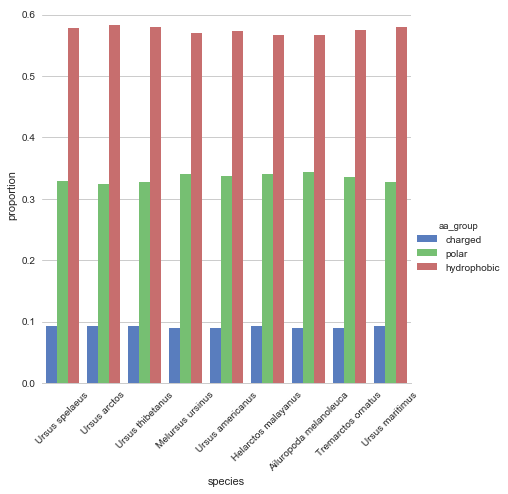

In [28]:
#plot proportion of amino acids for each group and each species
g = sns.factorplot(x="species", y="proportion", hue="aa_group", data=bears_long,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("proportion")
g.set_xticklabels(rotation=45)

## #8. Write the entire dataframe to a new CSV file

In [29]:
#write analyzed bears data to a csv named "bears_ctyb_aa_anal.csv"
bear_df_aa.to_csv("bears_ctyb_aa_anal.csv", index=False)

## #9 - Create a Histogram of Seq lengths

Thought I'd try this for fun - it would be more interesting with a larger dataset. 

From: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc294

In [30]:
#make a fasta file of translated seqs
from Bio.SeqRecord import SeqRecord
def make_protein_record(nuc_record):
    """Returns a new SeqRecord with the translated sequence (default table)."""
    return SeqRecord(seq = nuc_record.seq.translate(to_stop=True, table="Vertebrate Mitochondrial"), \
                     id = "trans_" + nuc_record.id, \
                     description = "translation of CDS, using default table")

from Bio import SeqIO
proteins = (make_protein_record(nuc_rec) for nuc_rec in \
            SeqIO.parse("bears_cytb.fasta", "fasta"))
SeqIO.write(proteins, "bears_translations.fasta", "fasta")

9

In [31]:
#calculate size of each bear cyt-b protein
sizes = [len(rec) for rec in SeqIO.parse("bears_translations.fasta", "fasta")]
len(sizes), min(sizes), max(sizes)
sizes

[379, 379, 379, 379, 379, 379, 379, 379, 379]

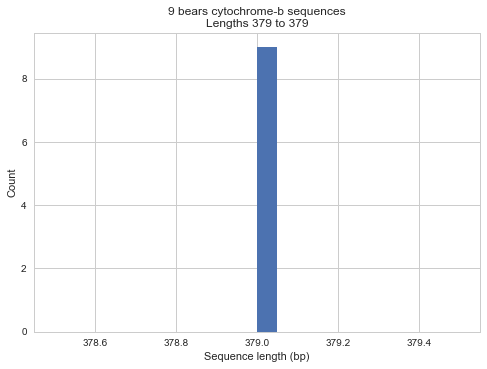

In [32]:
#plot distribution of sizes - turns out they are all the same! 
import pylab
pylab.hist(sizes, bins=20)
pylab.title("%i bears cytochrome-b sequences\nLengths %i to %i" \
            % (len(sizes),min(sizes),max(sizes)))
pylab.xlabel("Sequence length (bp)")
pylab.ylabel("Count")
pylab.show()